In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data_frame_liquors_2 = pd.read_csv('/content/drive/MyDrive/Databases/Week 10 - Wednesday/data_frame_liquors_2.csv')

In [4]:
#validar tipo de dato
data_frame_liquors_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434260 entries, 0 to 434259
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   invoice_id           434260 non-null  object 
 1   date                 434260 non-null  object 
 2   store_number         434260 non-null  int64  
 3   store_name           434260 non-null  object 
 4   address              434260 non-null  object 
 5   city                 434260 non-null  object 
 6   zip_code             434260 non-null  int64  
 7   store_location       434260 non-null  object 
 8   county_number        434260 non-null  int64  
 9   county               434260 non-null  object 
 10  category             434260 non-null  int64  
 11  category_name        434260 non-null  object 
 12  vendor_number        434260 non-null  int64  
 13  vendor_name          434260 non-null  object 
 14  item_number          434260 non-null  int64  
 15  item_description 

In [5]:
#cambiando a datetime
data_frame_liquors_2['date']= pd.to_datetime(data_frame_liquors_2['date'])

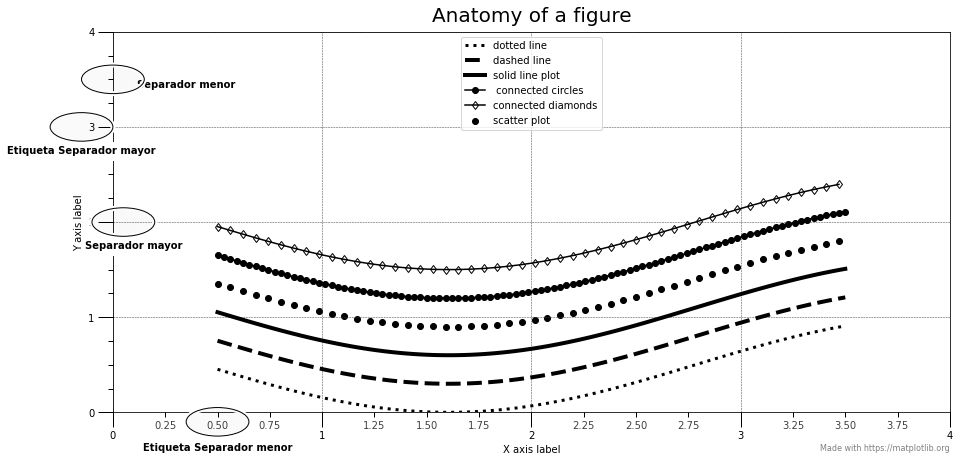

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))
Y4 = np.cos(1+X/0.75)/2 +0.5

fig = plt.figure(figsize=(15,7 ))

ax = fig.add_subplot(1, 1, 1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return f"{x:.2f}"

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
# FuncFormatter is created and used automatically
formatter = FuncFormatter(minor_tick)
ax.xaxis.set_minor_formatter(formatter)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=15)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)


ax.plot(X, Y4, linewidth=3, linestyle=':',  color='k',label ="dotted line ")
ax.plot(X, Y4+0.3, linewidth=4, linestyle='--', color='k', label ="dashed line")
ax.plot(X, Y4+0.6, linewidth=4, linestyle='-', color='k', label ="solid line plot")
ax.scatter(X[0::2], Y4[0::2]+0.9, marker='o', color='k', label ="scatter plot")
ax.plot(X, Y4+1.2, marker='o', color= 'k',label =" connected circles")
ax.plot(X[0::2], Y4[0::2]+1.5, marker='d',mfc='none', ls='-' ,color= 'k',label ="connected diamonds")


ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend(loc='upper center')


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",ha='center', va='top', weight='bold', color='k')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Etiqueta Separador menor")


# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Etiqueta Separador mayor")


ax.text(4.0, -0.4, "Made with https://matplotlib.org",fontsize=8, ha="right", color='.5')

#major tick
circle(0.05, 2)
text(0.1, 1.8, "Separador mayor")
# Minor tick
circle(0.00, 3.50)
text(0.35, 3.5, "Separador menor")

plt.show()

# **MATPLOTLIB**

In [7]:
#Creando el campo de semana
data_frame_liquors_2['semana'] = data_frame_liquors_2['date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [8]:
#Preparando dataset para matplotlib
#agrupamos ventas y botellas por semana
df_week = data_frame_liquors_2.groupby('semana')[['sale_usd','bottles_sold']].sum().round(2).reset_index()

In [9]:
#vemos info
df_week.head()

,semana,sale_usd,bottles_sold
0,1,2041752.88,196122.0
1,44,1115216.05,108704.0
2,45,5492420.15,546016.0
3,46,5242478.70,556566.0
4,47,5814606.15,572613.0


In [10]:
#Descartamos semanas que no están completas
#aquí básicamente es viendo el calendario
df_week = df_week[df_week['semana']>=45]

In [11]:
#usando estilo de classic para nuestras grficas
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('classic')#ggplot

## **Scatter**


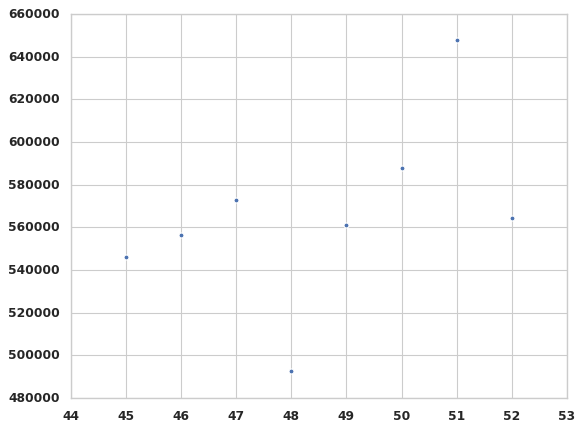

In [38]:
#Scatter simple para ver cual vende más
x = df_week['semana']
y = df_week['bottles_sold']
plt.scatter(x,y)

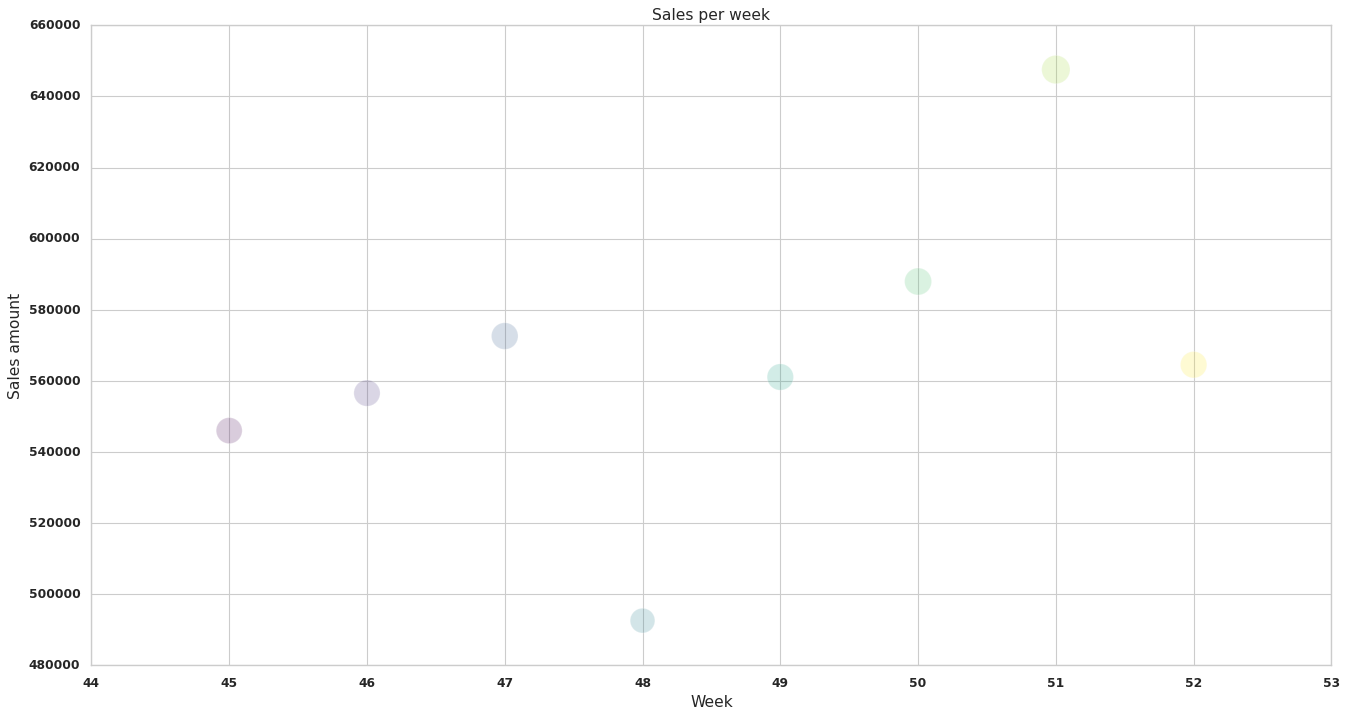

In [40]:
#Cambiamos tamaño de la gráfica
plt.figure(figsize=(20,10))
#Agregamos titulo
plt.title('Sales per week', fontsize=14)
#Ejex x label
plt.xlabel('Week', fontsize=14)
#Eje Y label
plt.ylabel('Sales amount', fontsize=14)
#Grid
plt.grid(True)
#Aplha permite opacidad, s es el tamaño, c es el color, cmap son mapas por default para usar como template
plt.scatter(x,y,alpha=.2,s=y/1000,c=x,cmap='viridis')#hot


## **Plot**

In [14]:
#Creando un nuevo df para nuestro plot
#Por time, agrupamos ventas y botellas
df_item_2 = data_frame_liquors_2.groupby('item_description')\
                                        [['sale_usd','bottles_sold']]\
                                        .sum().round(2).reset_index()

In [15]:
#vemos que tiene
df_item_2.head()

,item_description,sale_usd,bottles_sold
0,1800 Anejo,6387.80,190.0
1,1800 Coconut,4011.87,173.0
2,1800 Reposado,42501.72,1946.0
3,1800 Silver,62894.70,2974.0
4,1800 Silver Mini,1392.30,42.0


In [16]:
#Creamos otro Data Frame para hacer un top 10 por ventas
t_1 = df_item_2.nlargest(10,'sale_usd')
t_1.head()


,item_description,sale_usd,bottles_sold
1984,Titos Handmade Vodka,1472419.78,163958.0
252,Black Velvet,1418759.13,191112.0
783,Fireball Cinnamon Whiskey,1319089.76,434309.0
963,Hennessy VS,1179556.55,75086.0
398,Captain Morgan Original Spiced,1144989.22,114016.0


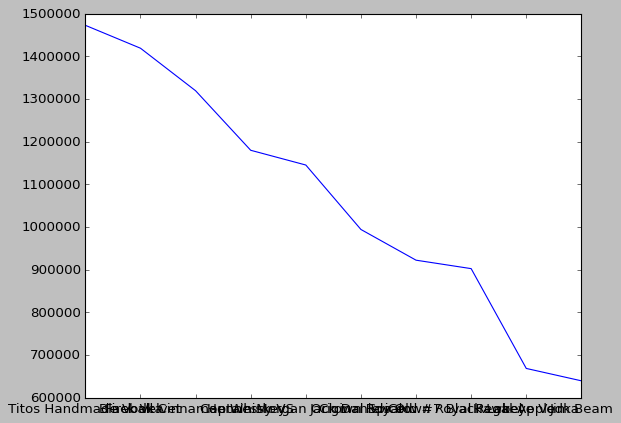

In [17]:
#Nuevas variables para nuestro plot
x = t_1['item_description']
y = t_1['sale_usd']
plt.plot(x,y)

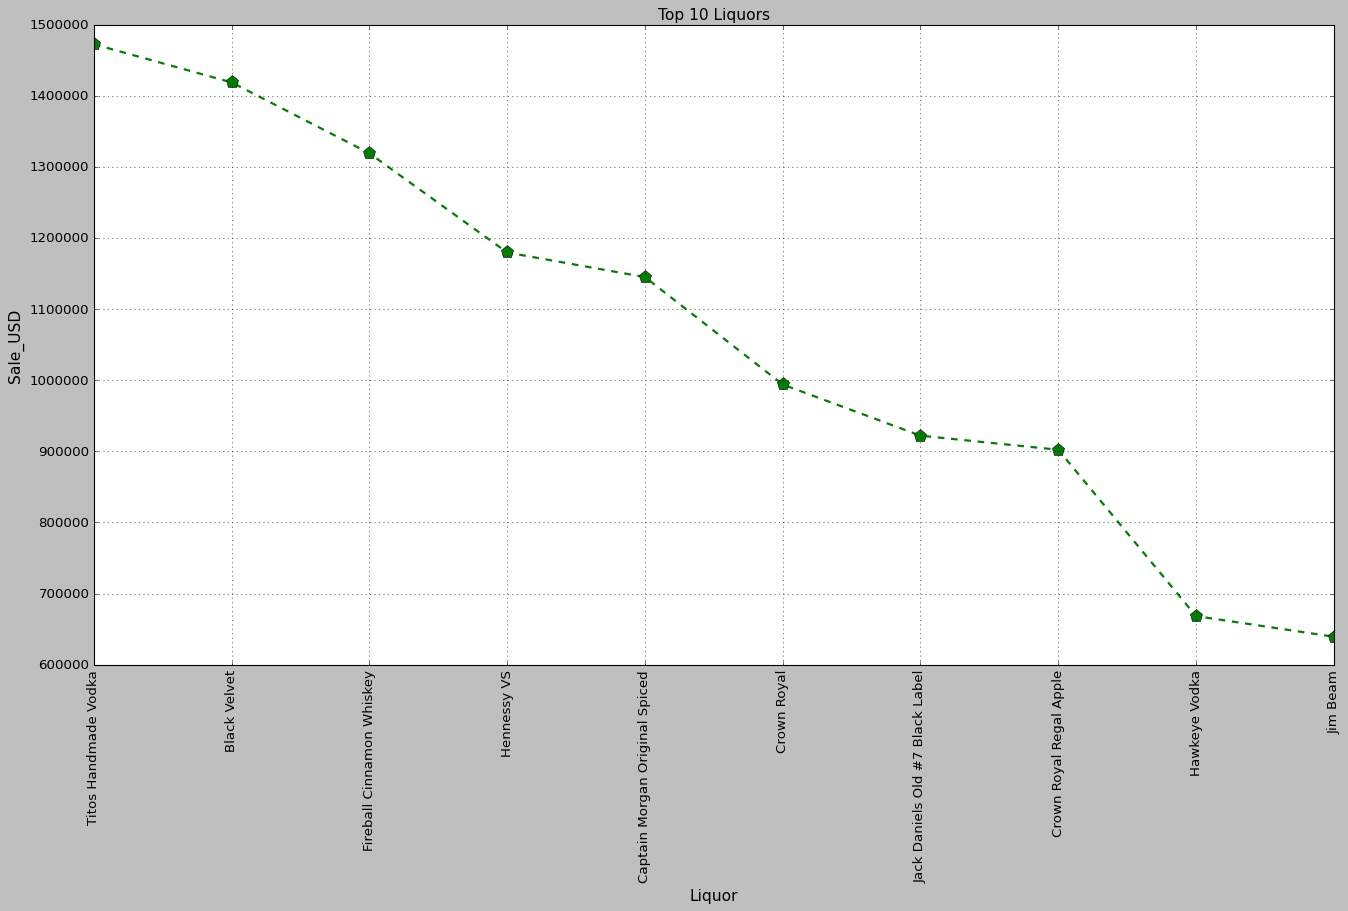

<Figure size 640x480 with 0 Axes>

In [18]:
#Tamaño del plot
plt.figure(figsize=(20,10))
#Titulo del plot
plt.title('Top 10 Liquors', fontsize=14)
#Titulo eje x
plt.xlabel('Liquor', fontsize=14)
#Titulo eje y
plt.ylabel('Sale_USD', fontsize=14)

#Grid
plt.grid(True)

#Rotamos los label del eje para que se puedan ver
plt.xticks(rotation='vertical')
# https://matplotlib.org/stable/api/markers_api.html .,1,2,3,8
#Color de los valores verde, que el marker sea un circulo, línea puntada, grosor de la linea de 2, tamaño del marcador de 12
plt.plot(x,y,color='green', marker='p', linestyle='dashed',linewidth=2, markersize=12)

#Guardamos figura
plt.figure().savefig('test.jpg')

## **Subplots**

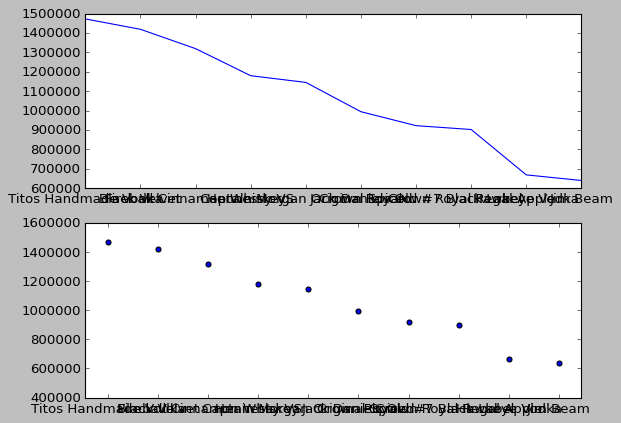

In [19]:
#Creando subplots
fig, axs = plt.subplots(2)
# creates a figure and a grid of subplots with a single call, while providing reasonable control over how the individual plots are created

#Graficamos plot
axs[0].plot(x, y)
#Graficamos scatter
axs[1].scatter(x, y)

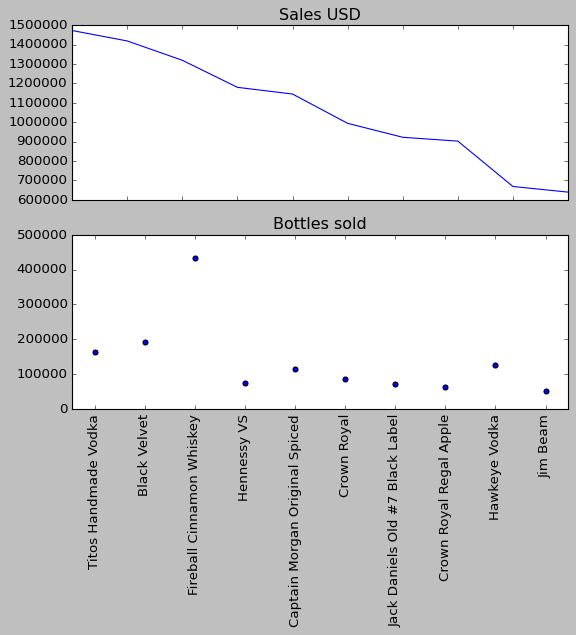

<Figure size 640x480 with 0 Axes>

In [20]:
#Creando subplots
fig, axs = plt.subplots(2)

#Graficamos plot
axs[0].plot(x, y)
#Graficamos scatter
axs[1].scatter(x, y)


#fijamos el titulo de cada grafica
axs[0].title.set_text('Sales USD')
axs[1].title.set_text('Bottles sold')

#removemos el label del eje x de una de ellas
axs[0].set_xticklabels([])

#definimos valor de variable
x = t_1['item_description']
y = t_1['sale_usd']


#cambiamos variable
y = t_1['bottles_sold']

#Vertical
plt.xticks(rotation='vertical')


#Guardamos figura
plt.figure().savefig('subplots.jpg')

[]

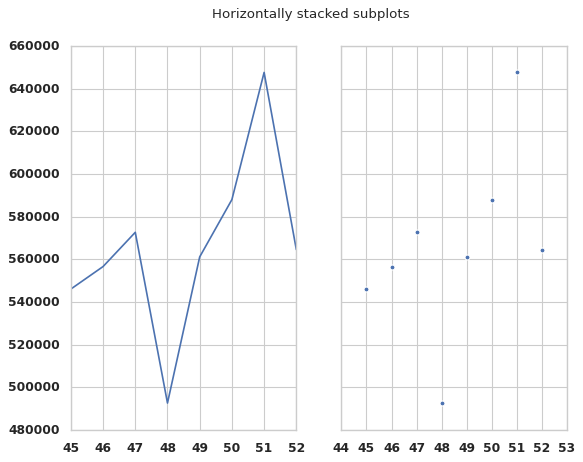

In [45]:
#Graficando igual que arriba pero horizonalets
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
#Graficamos scatter
ax2.scatter(x, y)

ax2.set_yticklabels([])

## **Pie Chart**

([<matplotlib.patches.Wedge at 0x7fd126d6c7d0>,
 [Text(0.9980570165757651, 0.46247399025662317, 'Titos Handmade Vodka'),
  Text(0.30911435342151095, 1.0556743420718349, 'Black Velvet'),
  Text(-0.5484675972632906, 0.9535110354643165, 'Fireball Cinnamon Whiskey'),
  Text(-1.046739063753614, 0.338138037511617, 'Hennessy VS'),
  Text(-1.0245292309173963, -0.4004245933953217, 'Captain Morgan Original Spiced'),
  Text(-0.5916248875579848, -0.9273510621237256, 'Crown Royal'),
  Text(-0.0035871670804614167, -1.0999941509991482, 'Jack Daniels Old #7 Black Label'),
  Text(0.5601695144627075, -0.9466837460665598, 'Crown Royal Regal Apple'),
  Text(0.9238948979580974, -0.597007719821944, 'Hawkeye Vodka'),
  Text(1.0805400294576724, -0.20599331236623433, 'Jim Beam')])

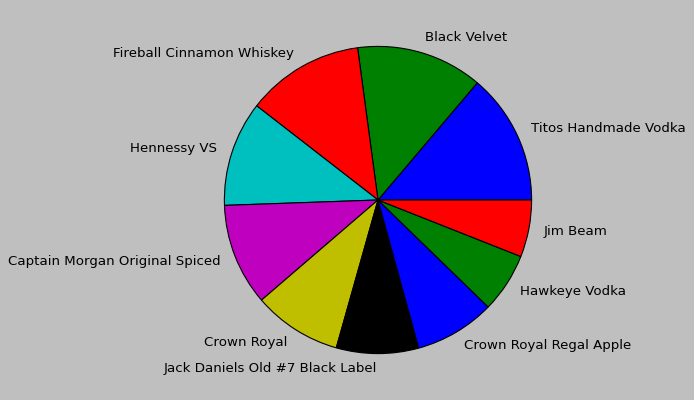

In [21]:
#creamos variables para pie chart
labels = t_1['item_description']
sizes = t_1['sale_usd']

#Graficamos pie sencillo
plt.pie( sizes, labels=labels)

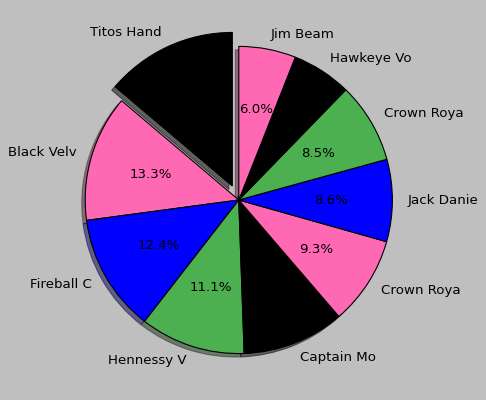

In [22]:
#Cortamos string de item a 10 caracteres y asignamos cariables nuevamente
labels = t_1['item_description'].str[:10]
sizes = t_1['sale_usd']

#Variable para resaltar un campo
explode = (0.1, 0, 0, 0,0, 0, 0, 0,0,0) 
mycolors = ["black", "hotpink", "b", "#4CAF50"]

#generando piechart, #autpoct es para decimales, startangle para que nos muestre desde los 90
plt.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = mycolors)


plt.show()


In [23]:
#Código para cambiar la fuente de todos nuestros graficos
#creamos diccionario KWaRGS
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
# This enables you to easily switch between several configurations. Use matplotlib.style.use('default') or rcdefaults() to restore the default rcParams after changes.
# Note you can use python's kwargs dictionary facility to store dictionaries of default parameters. e.g., you can customize the font rc as follows:
#setear parametros, también podemos poner de líneas, dots,e tc....
#pasamos diccionario
plt.rc('font', **font)

## **Barchart**

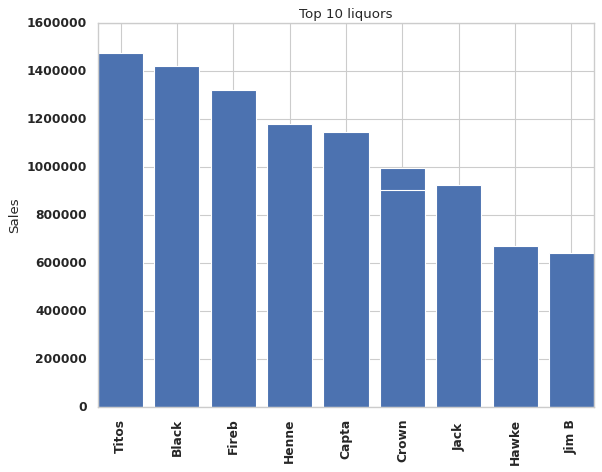

In [47]:
#creamos variables para barchart
x = t_1['item_description'].str[:5]
y = t_1['sale_usd']

#graficamos barchart
plt.bar(x, y, align='center')
# plt.xticks(y_pos, objects)
plt.xticks(rotation='vertical')
plt.ylabel('Sales')
plt.title('Top 10 liquors')

plt.show()

# **SEABORN**

In [25]:
import seaborn as sns

In [51]:
#variables niciales para Seaborn
#vamos a ver por pack, como se vende nuestras botellas
x = data_frame_liquors_2['pack']
y = data_frame_liquors_2['state_bottle_retail']

## **Displot**

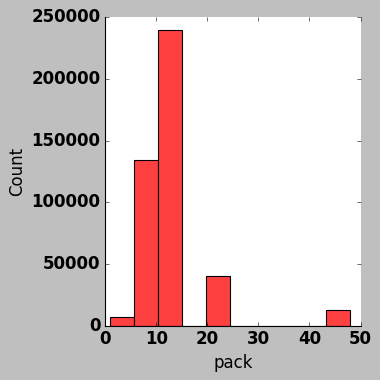

In [27]:
#variables numericas
##Trabajamos con el adtaset completo, permite ver como se distribuye
# bins : especificamos por cuantos grupos debe agrupar, sino busca la mejor manera
# Specification of hist bins. If unspecified, as reference rule is used that tries to find a useful default.



sns.displot(x,bins=10,color='r')

## **Jointplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


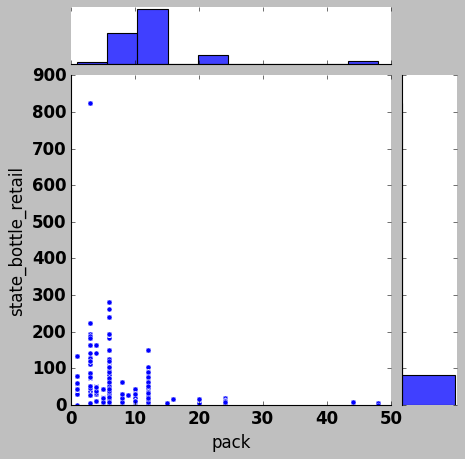

In [28]:
#Variables numericas
#especificamos igual cuantos bins
sns.jointplot(x,y,marginal_kws=dict(bins=10))

## **Heatmap**

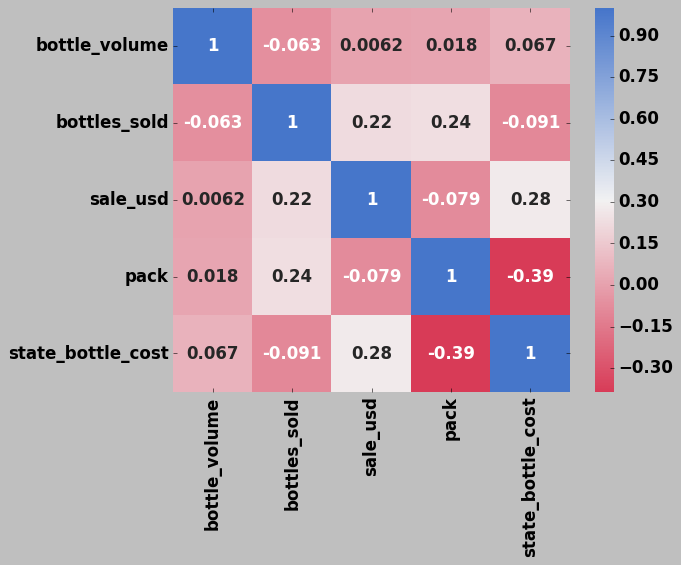

In [29]:
#Usamos correlación
# Queremos ver cual afecta más a las ventas

df_liq_corr= data_frame_liquors_2[['bottle_volume','bottles_sold','sale_usd','pack','state_bottle_cost']].corr()
cmap = sns.diverging_palette(6, 255, as_cmap=True)
sns.heatmap(df_liq_corr, cmap=cmap,annot=True)

## **Scatterplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


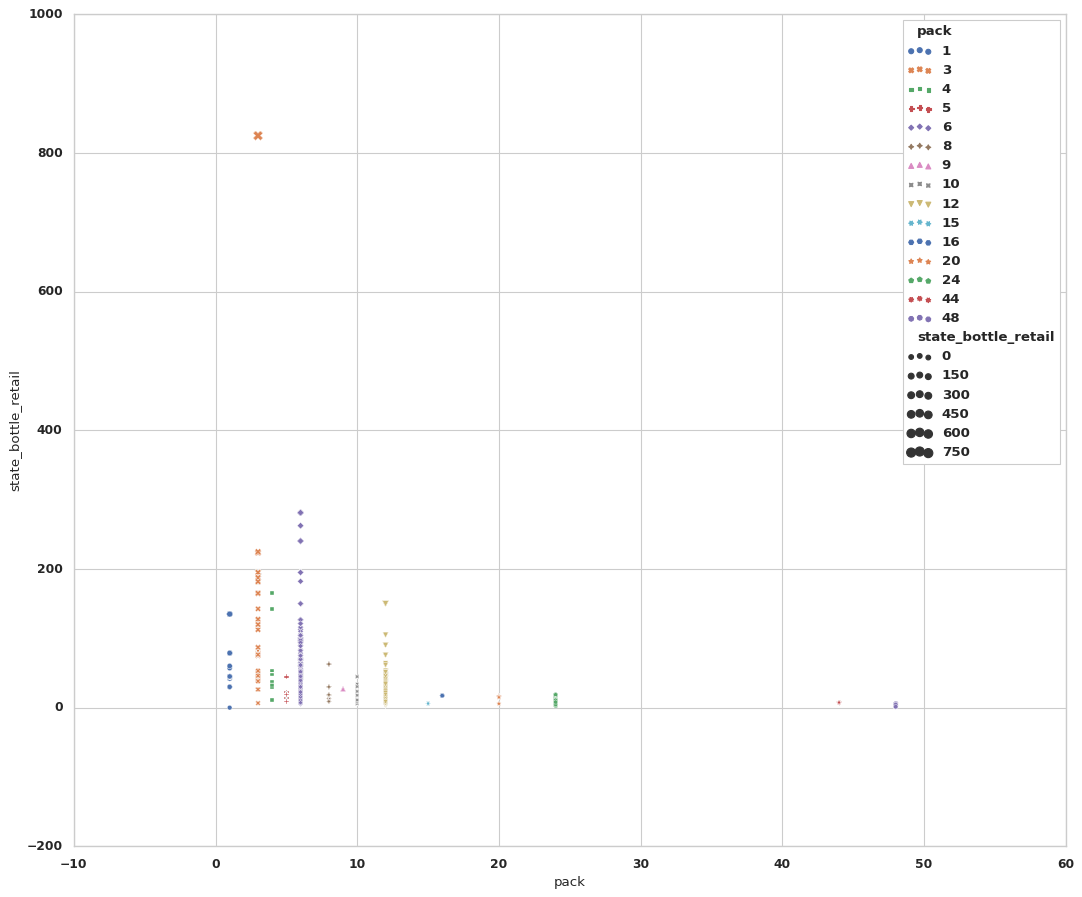

In [53]:
#variables numericas
#cambiamos estilo para nuestro scatter
#Cambiamos tamaño
sns.set(style='whitegrid')
plt.figure(figsize=(16, 13))
#Style nos va a color diferente marcador según sea
#hue es para el color
#data definimos que vamos a graficar, en este caso es cuando hay de venta
sns.scatterplot(x,y,data=y,style=x,hue=x,palette="deep",size=y)

## **Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


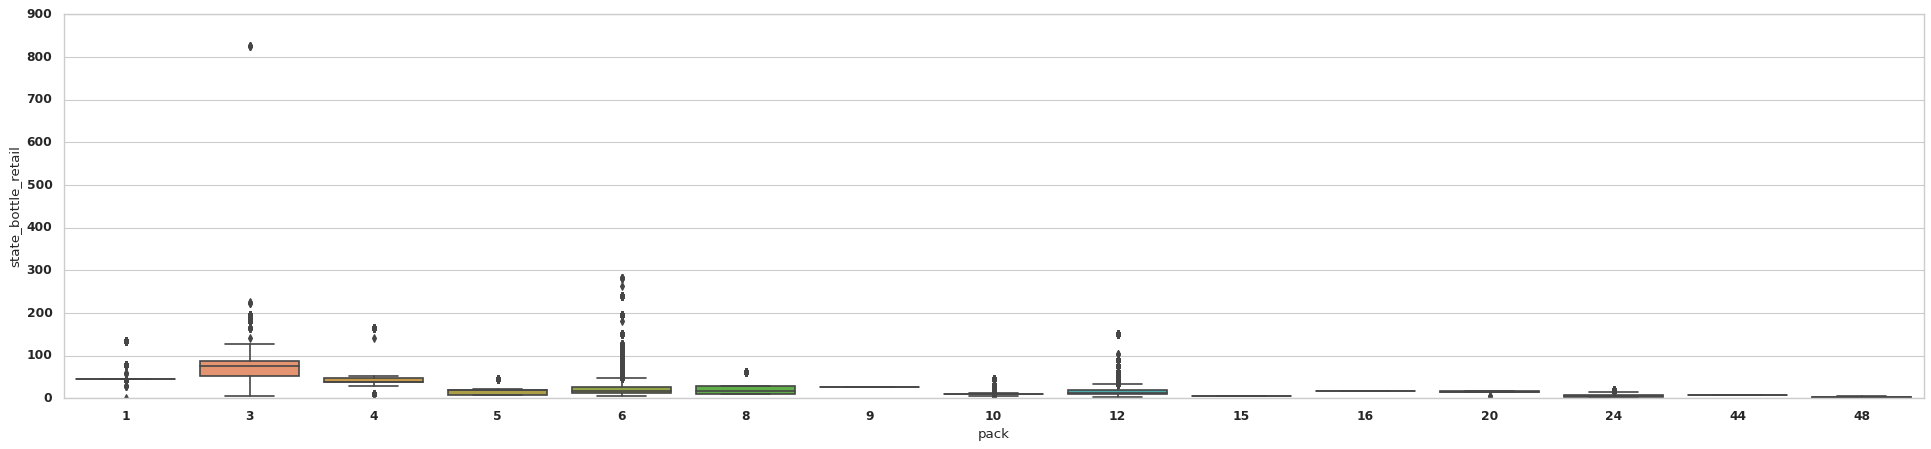

In [31]:
#vemos rápidamente neustros outliers
plt.figure(figsize=(30, 6))
sns.boxplot(x,y)

## **Facet Grid**

In [32]:
#creamos nuevo dataframe para ver por pack, cual vende más
df_pack = data_frame_liquors_2.groupby('pack')\
                                        ['sale_usd']\
                                        .sum().round(2).reset_index()

In [33]:
#obtenemos top5 
t_pack= df_pack.nlargest(5,'sale_usd')
t_pack['class'] = 'top_5'
t_pack.head(10)

,pack,sale_usd,class
8,12,28172222.36,top_5
4,6,15158223.00,top_5
12,24,3267006.34,top_5
14,48,1103996.27,top_5
7,10,547744.31,top_5


In [34]:
#hacemos join y creamos nuevo dataframe aara visualizar unicamente los top 5 en neustras graficas
table_concat = pd.merge(data_frame_liquors_2, t_pack[['pack','class']],how='left', on=['pack']).reset_index()

In [35]:
#Creamos DF con filtro de top 5
df_top_5 = table_concat[table_concat['class']=='top_5']

In [54]:
df_top_5

,index,invoice_id,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume,state_bottle_cost,state_bottle_retail,bottles_sold,sale_usd,volume_sold_lt,volume_sold_gallons,date_mes,date_mes_truncate,semana,class
0,0,INV-22970800091,2019-11-01,2569,Hy-Vee Food Store #2 / Cedar Rapids,279 Collins Road NE,Cedar Rapids,52402,POINT (-91.630677 42.027805),57,LINN,1062500,Flavored Rum,370,PERNOD RICARD USA,42718,Malibu Coconut Rum,6,1.75,16.99,25.49,1.0,25.49,1.75,0.46,11,2019-11-01,44,top_5
1,1,INV-22958000044,2019-11-01,2603,Hy-Vee Wine and Spirits / Bettendorf,2890 Devils Glen Road,Bettendorf,52722,POINT (-90.483701 41.552338),82,SCOTT,1062200,White Rum,434,LUXCO INC,45278,Paramount White Rum,6,1.75,7.84,11.76,6.0,70.56,10.50,2.77,11,2019-11-01,44,top_5
2,2,INV-22975400022,2019-11-01,5857,EZ Stop II - Dubuque,700 Rhomberg Avenue,Dubuque,52001,POINT (-90.663494 42.515732),31,DUBUQUE,1031100,American Vodkas,255,Infinium Spirits,37886,Seagrams Extra Smooth Vodka,12,750.00,5.38,8.07,2.0,16.14,1.50,0.39,11,2019-11-01,44,top_5
3,3,INV-22976000009,2019-11-01,3782,Bender Foods / Guttenberg,619 S Hwy 52,Guttenberg,52052,POINT (-91.100489 42.77964),22,CLAYTON,1012100,Canadian Whiskies,85,Brown Forman Corp.,12467,Canadian Mist Whisky,12,1.00,7.22,10.83,3.0,32.49,3.00,0.79,11,2019-11-01,44,top_5
4,4,INV-22951100010,2019-11-01,4678,Fareway Stores #124 / Adel,804 Nile Kinnick Dr,Adel,50003,POINT (-94.01679600000001 41.61025),25,DALLAS,1012100,Canadian Whiskies,55,SAZERAC NORTH AMERICA,12408,Canadian Ltd Whisky,6,1.75,8.14,12.21,6.0,82.26,10.50,2.77,11,2019-11-01,44,top_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434255,434255,INV-24264100023,2019-12-31,3943,Good and Quick Co,519 Lincolnway,Nevada,50201,POINT (-93.464816 42.022781),85,STORY,1081300,American Cordials & Liqueur,322,Prestige Wine & Spirits Group,75212,Kinky Blue Mini,6,50.00,4.84,7.26,2.0,14.52,0.10,0.02,12,2019-12-01,1,top_5
434256,434256,INV-24260000052,2019-12-31,4102,Fareway Stores #386 / Ames,619 Burnett Ave,Ames,50010,POINT (-93.615428 42.027426),85,STORY,1011200,Straight Bourbon Whiskies,85,Brown Forman Corp.,22215,Woodford Reserve,12,750.00,22.49,33.74,4.0,134.96,3.00,0.79,12,2019-12-01,1,top_5
434257,434257,INV-24263600053,2019-12-31,2663,Hy-Vee Food Store / Urbandale,8701 Douglas,Urbandale,50322,POINT (-93.739105 41.629364),77,POLK,1062400,Spiced Rum,395,PROXIMO,46504,Kraken Black Spiced Rum,12,750.00,10.45,15.68,12.0,188.16,9.00,2.37,12,2019-12-01,1,top_5
434258,434258,INV-24272000003,2019-12-31,4203,Liquor and Tobacco Outlet /,620 W Bremer Ave,Waverly,50677,POINT (-92.47898 42.725694),9,BREMER,1031100,American Vodkas,402,Oz Spirits LLC,36447,Ingenioz,12,750.00,12.54,18.81,12.0,225.72,9.00,2.37,12,2019-12-01,1,top_5


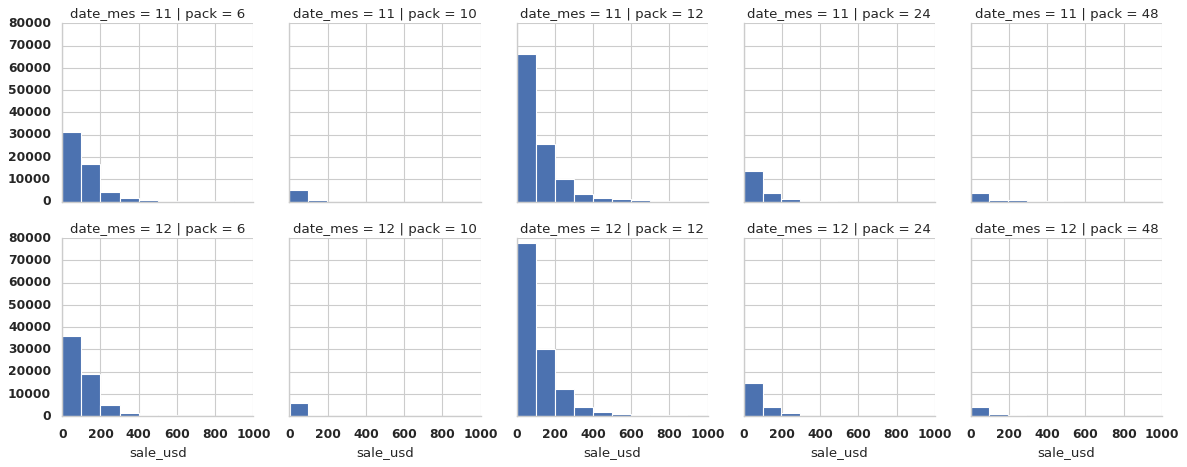

In [36]:
#Generamos un FacetGrid
#unicamente con la cantidad de packs que venden más
#bins poir ragngos, eje y es cantidad, eje x monto
#permite graficar multiples campos según condicionales
multiple = sns.FacetGrid(df_top_5,col='pack',row='date_mes')
multiple.map(plt.hist,'sale_usd')
